In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub
tf.config.run_functions_eagerly(True)

import os, warnings
warnings.filterwarnings("ignore")

In [10]:
image_path = 'car_illus.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[400, 400])

In [11]:
# Embossing kernel
kernel = tf.constant([
    [-2, -1, 0],
    [-1, 1, 1],
    [0, 1, 2],
])

# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=[1, 1, 1, 1],
    padding='VALID',
)

image_detect = tf.nn.relu(image_filter)

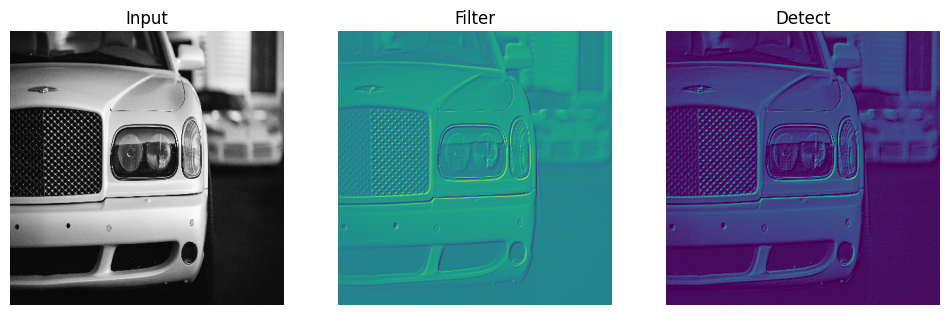

In [12]:
# Show what we have so far
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Input')
plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Filter')
plt.subplot(133)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Detect')
display()

In [13]:
image_condense = tf.nn.pool(
    input=image_detect,
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

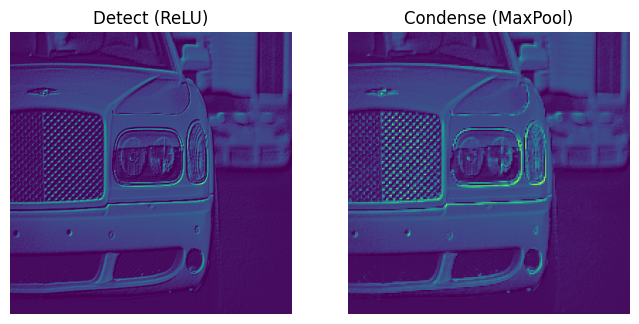

In [15]:
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title("Detect (ReLU)")
plt.subplot(122)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title("Condense (MaxPool)")
display()

There is, however, a kind of average pooling that is still widely used in the head of a convnet. This is global average pooling. A GlobalAvgPool2D layer is often used as an alternative to some or all of the hidden Dense layers in the head of the network, like so:

What is this layer doing? Notice that we no longer have the Flatten layer that usually comes after the base to transform the 2D feature data to 1D data needed by the classifier. Now the GlobalAvgPool2D layer is serving this function. But, instead of "unstacking" the feature (like Flatten), it simply replaces the entire feature map with its average value. Though very destructive, it often works quite well and has the advantage of reducing the number of parameters in the model.

Global average pooling is often used in modern convnets. One big advantage is that it greatly reduces the number of parameters in a model, while still telling you if some feature was present in an image or not -- which for classification is usually all that matters